<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS-Norway 3rd Annual Meeting - Hackathon
## Use case 5: Aggregate to same time resolution, convert data to have same unit 



Make code to aggregate different time series to same resolution and converts data to same unit (ex. ug/m3 and ppb). Next step can be to use model data where observational data is missing.  

Main aim: Easy access to data sets that are easier to use in VRE or own analysis and compare various variables and model data.   

## Use case 6: Combine variables  

Use rain amount and concentration in rain to derive deposition, plot time time series of different variables (eg ozone and PM), make scatter plot z versus y, find meteorological observations at station or nearby (RH, T, wind) 

Main aim: Provide a well-documented product combining variables to obtain a new deposition variable, and analyze this further with other data and models    

In [1]:
# Importing useful python libraries
import xarray as xr 
import threddsclient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import datetime
import os
import json

In [3]:
f = open('basket-precipdepthBirkenes2.json')
md = json.load(f) 
md

{'206119': {'id': 206119,
  'title': 'Precipitation_amount at Birkenes',
  'matrix': 'precipitation phase',
  'instrumentType': 'precipitation sampler',
  'station': 'Birkenes I',
  'startTime': '1989-12-31T23:00:00.0000000Z',
  'endTime': '2009-12-31T23:00:00.0000000Z',
  'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/G9/F6/FH/G9F6-FHPG.nc',
  'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/G9/F6/FH/G9F6-FHPG.nc',
  'variables': ['precipitation depth'],
  'pid': 'https://doi.org/10.48597/G9F6-FHPG',
  'repository': 'IN-SITU'},
 '208450': {'id': 208450,
  'title': 'Inorganics in precipitation at Birkenes',
  'matrix': 'precipitation phase',
  'instrumentType': 'precipitation sampler',
  'station': 'Birkenes I',
  'startTime': '2000-09-03T22:00:00.0000000Z',
  'endTime': '2001-12-31T23:00:00.0000000Z',
  'downloadUrl': 'https://thredds.nilu.no/thredds/fileServer/ebas_doi/YV/C8/GZ/YVC8-GZUJ.nc',
  'opendapUrl': 'https://thredds.nilu.no/thredds/dodsC/eba

In [4]:
opendap = []
for i in md:
    print(i)
    print(md[i]['startTime'])
    print(md[i]['endTime'])

    opendap.append(md[i]['opendapUrl'])




206119
1989-12-31T23:00:00.0000000Z
2009-12-31T23:00:00.0000000Z
208450
2000-09-03T22:00:00.0000000Z
2001-12-31T23:00:00.0000000Z
210491
2002-12-31T23:00:00.0000000Z
2009-12-31T23:00:00.0000000Z
227905
1979-12-31T23:00:00.0000000Z
1984-12-31T23:00:00.0000000Z
227907
1984-12-31T23:00:00.0000000Z
1986-12-31T23:00:00.0000000Z
227909
1986-12-31T23:00:00.0000000Z
1990-12-31T23:00:00.0000000Z
227911
2010-12-31T23:00:00.0000000Z
2011-12-31T23:00:00.0000000Z
227920
2011-12-31T23:00:00.0000000Z
2012-12-31T23:00:00.0000000Z
227928
2012-12-31T23:00:00.0000000Z
2013-12-31T23:00:00.0000000Z
235134
2016-12-31T23:00:00.0000000Z
2022-12-31T23:00:00.0000000Z
238226
1990-12-31T23:00:00.0000000Z
2023-12-31T23:00:00.0000000Z
228004
2013-12-31T23:00:00.0000000Z
2019-12-31T23:00:00.0000000Z
228044
2009-12-31T23:00:00.0000000Z
2019-12-31T23:00:00.0000000Z


In [44]:
opendap = []

for i in md:
    print(i)
    ds = xr.open_dataset(md[i]['opendapUrl'])
    #print(list(ds.data_vars.keys()))

    #print(ds.attrs['ebas_resolution_code'])
    if ds.attrs['ebas_station_code'] == 'NO0002R':
        print("Wrong station")
    

    if ds.attrs['ebas_resolution_code'] == '1d':
        opendap.append(md[i]['opendapUrl'])
    
    """
    for j in list(ds.data_vars.keys()):
        if '' in ds[j].attrs:
            print(ds[j].attrs[''])
        else:
            print("Attribute not found")
        print('---------------------')
    """

206119
208450
210491
227905
227907
227909
227911
227920
227928
235134
238226
228004
228044


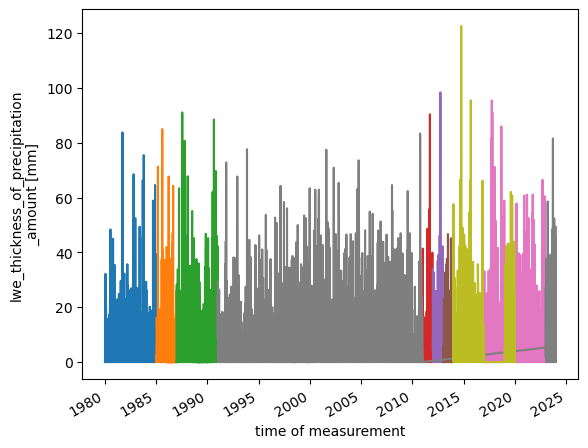

In [41]:
for i in range(len(opendap)):
    ds = xr.open_dataset(opendap[i])
    #print(ds.precipitation_amount)
    ds.precipitation_amount.plot()
    

In [45]:
list_ds = []
for i in range(len(opendap)):
    list_ds.append(xr.open_dataset(opendap[i]))
list_ds

[<xarray.Dataset>
 Dimensions:                                     (time: 1827, tbnds: 2,
                                                  metadata_time: 5,
                                                  precipitation_amount_qc_flags: 1,
                                                  ammonium_mg_N_per_l_qc_flags: 1,
                                                  ammonium_mg_per_l_qc_flags: 1,
                                                  conductivity_qc_flags: 1,
                                                  ...
                                                  nitrate_mg_per_l_qc_flags: 1,
                                                  pH_qc_flags: 1,
                                                  sulphate_corrected_mg_S_per_l_qc_flags: 1,
                                                  sulphate_corrected_mg_per_l_qc_flags: 1,
                                                  sulphate_total_mg_S_per_l_qc_flags: 1,
                                             

In [46]:
precip_ds = xr.concat([ds.precipitation_amount for ds in list_ds], dim='time')
precip_ds

<xarray.DataArray 'precipitation_amount' (time: 16070)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T19:00:00 ... 2019-12-31T19:00:00
Attributes: (12/38)
    standard_name:                 lwe_thickness_of_precipitation_amount
    units:                         mm
    ancillary_variables:           precipitation_amount_qc precipitation_amou...
    cell_methods:                  time: sum
    ebas_data_license:             https://creativecommons.org/licenses/by/4.0/
    ebas_revision_date:            20100416000000
    ...                            ...
    ebas_framework_acronym:        CAMP, EMEP, NILU
    ebas_framework_name:           OSPARCOM - Comprehensive Atmospheric Monit...
    ebas_framework_description:    The OSPARCOM Comprehensive Atmospheric Mon...
    ebas_framework_contact_name:   Wenche Aas, Kjetil Tørseth, Kjetil Tørseth
    ebas_framework_contact_email:  waa@nilu.no, kt@nilu.no, kt@nilu.no
    ebas_acknowledgement:          Data used in this <study/report/figure/etc...

In [33]:
precip_ds_mean = precip_ds.groupby("time").mean()
precip_ds_mean

<xarray.DataArray 'precipitation_amount' (time: 17133)>
array([ 0. ,  0. ,  0. , ...,  4.1,  3.5, 49.3])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T19:00:00 ... 2023-12-31T19:00:00
Attributes: (12/37)
    standard_name:                 lwe_thickness_of_precipitation_amount
    units:                         mm
    ancillary_variables:           precipitation_amount_qc precipitation_amou...
    cell_methods:                  time: sum
    ebas_data_license:             https://creativecommons.org/licenses/by/4.0/
    ebas_revision_date:            20100416000000
    ...                            ...
    ebas_framework_acronym:        CAMP, EMEP, NILU
    ebas_framework_name:           OSPARCOM - Comprehensive Atmospheric Monit...
    ebas_framework_description:    The OSPARCOM Comprehensive Atmospheric Mon...
    ebas_framework_contact_name:   Wenche Aas, Kjetil Tørseth, Kjetil Tørseth
    ebas_framework_contact_email:  waa@nilu.no, kt@nilu.no, kt@nilu.no
    ebas_acknowledgement:          Data used in this <study/report/figure/etc...

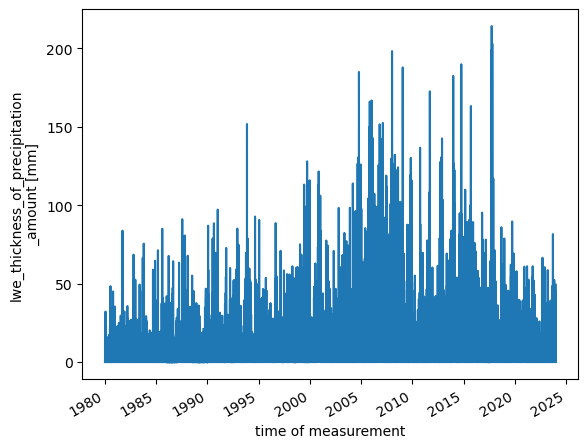

In [34]:
precip_ds_mean.plot()

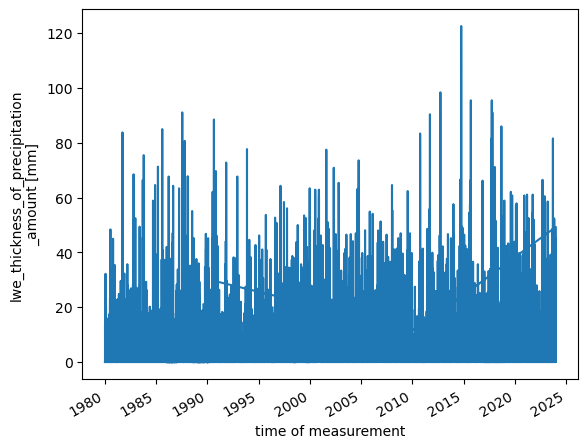

In [47]:
precip_ds.plot()

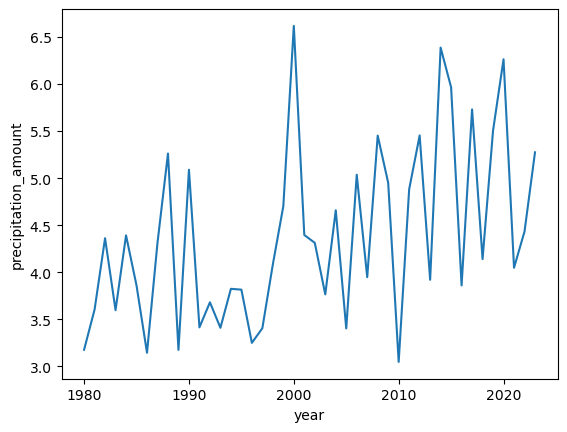

In [50]:
(precip_ds.groupby("time.year").sum()/365).plot()

TypeError: No numeric data to plot.

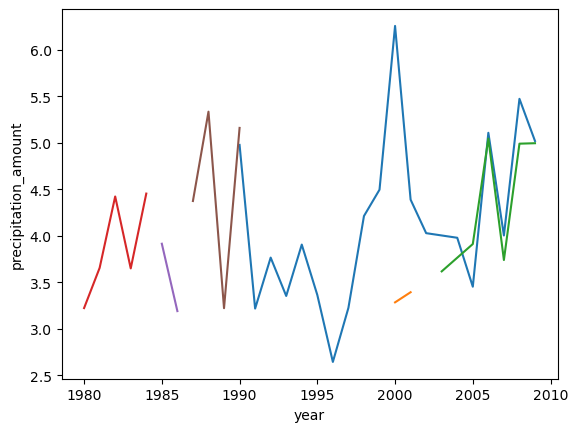

In [14]:
for i in range(len(opendap)):
    ds = xr.open_dataset(opendap[i])


    
    if ds.precipitation_amount.dtype.kind == 'f':
        (ds.precipitation_amount.groupby("time.year").sum()/360).plot()


In [ ]:
ds = xr.open_dataset(opendap[0])
print(ds)

<xarray.Dataset>
Dimensions:                            (time: 901, tbnds: 2, metadata_time: 19,
                                        precipitation_amount_qc_flags: 2)
Coordinates:
  * time                               (time) datetime64[ns] 1990-01-04T19:00...
  * metadata_time                      (metadata_time) datetime64[ns] 1990-07...
Dimensions without coordinates: tbnds, precipitation_amount_qc_flags
Data variables:
    time_bnds                          (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                 (metadata_time, tbnds) datetime64[ns] ...
    precipitation_amount               (time) float64 ...
    precipitation_amount_qc            (precipitation_amount_qc_flags, time) float64 ...
    precipitation_amount_ebasmetadata  (metadata_time) |S64 ...
Attributes: (12/97)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         Precipitation_amount at Birkenes
    keywords:      

In [ ]:
opendap2 = []
for i in md:
    print(md[i]['startTime'])
    if md[i]['startTime'] > '2016-01-01T00:00:00Z' and md[i]['endTime'] < '2024-12-31T23:59:59Z':
        opendap2.append(md[i]['opendapUrl'])
print(opendap2)


1989-12-31T23:00:00.0000000Z
2000-09-03T22:00:00.0000000Z
2002-12-31T23:00:00.0000000Z
1979-12-31T23:00:00.0000000Z
1984-12-31T23:00:00.0000000Z
1986-12-31T23:00:00.0000000Z
2010-12-31T23:00:00.0000000Z
2011-12-31T23:00:00.0000000Z
2012-12-31T23:00:00.0000000Z
2016-12-31T23:00:00.0000000Z
1990-12-31T23:00:00.0000000Z
2013-12-31T23:00:00.0000000Z
2009-12-31T23:00:00.0000000Z
['https://thredds.nilu.no/thredds/dodsC/ebas_doi/WV/3R/JC/WV3R-JC56.nc']


In [ ]:
for i in range(len(opendap2)):
    ds = xr.open_dataset(opendap2[i])
    #print(ds.precipitation_amount)
    print(ds)
    #ds.precipitation_amount.plot()

<xarray.Dataset>
Dimensions:                                 (time: 1826, tbnds: 2,
                                             metadata_time: 5,
                                             precipitation_amount_qc_flags: 2,
                                             ammonium_mg_N_per_l_qc_flags: 3,
                                             ammonium_mg_per_l_qc_flags: 3,
                                             calcium_qc_flags: 2,
                                             ...
                                             nitrate_mg_per_l_qc_flags: 3,
                                             pH_qc_flags: 2,
                                             potassium_qc_flags: 2,
                                             sodium_qc_flags: 2,
                                             sulphate_total_mg_S_per_l_qc_flags: 2,
                                             sulphate_total_mg_per_l_qc_flags: 2)
Coordinates:
  * time                                    (time) dateti

In [ ]:
ds = xr.open_dataset(opendap2[0])
ds

<xarray.Dataset>
Dimensions:                                 (time: 1826, tbnds: 2,
                                             metadata_time: 5,
                                             precipitation_amount_qc_flags: 2,
                                             ammonium_mg_N_per_l_qc_flags: 3,
                                             ammonium_mg_per_l_qc_flags: 3,
                                             calcium_qc_flags: 2,
                                             ...
                                             nitrate_mg_per_l_qc_flags: 3,
                                             pH_qc_flags: 2,
                                             potassium_qc_flags: 2,
                                             sodium_qc_flags: 2,
                                             sulphate_total_mg_S_per_l_qc_flags: 2,
                                             sulphate_total_mg_per_l_qc_flags: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 2017-01-01T...
  * metadata_time                           (metadata_time) datetime64[ns] 20...
Dimensions without coordinates: tbnds, precipitation_amount_qc_flags,
                                ammonium_mg_N_per_l_qc_flags,
                                ammonium_mg_per_l_qc_flags, calcium_qc_flags,
                                chloride_qc_flags, conductivity_qc_flags,
                                magnesium_qc_flags,
                                nitrate_mg_N_per_l_qc_flags,
                                nitrate_mg_per_l_qc_flags, pH_qc_flags,
                                potassium_qc_flags, sodium_qc_flags,
                                sulphate_total_mg_S_per_l_qc_flags,
                                sulphate_total_mg_per_l_qc_flags
Data variables: (12/44)
    time_bnds                               (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                      (metadata_time, tbnds) datetime64[ns] ...
    precipitation_amount                    (time) float64 ...
    precipitation_amount_qc                 (precipitation_amount_qc_flags, time) float64 ...
    precipitation_amount_ebasmetadata       (metadata_time) |S64 ...
    ammonium_mg_N_per_l                     (time) float64 ...
    ...                                      ...
    sulphate_total_mg_S_per_l               (time) float64 ...
    sulphate_total_mg_S_per_l_qc            (sulphate_total_mg_S_per_l_qc_flags, time) float64 ...
    sulphate_total_mg_S_per_l_ebasmetadata  (metadata_time) |S64 ...
    sulphate_total_mg_per_l                 (time) float64 ...
    sulphate_total_mg_per_l_qc              (sulphate_total_mg_per_l_qc_flags, time) float64 ...
    sulphate_total_mg_per_l_ebasmetadata    (metadata_time) |S64 ...
Attributes: (12/93)
    Conventions:                      CF-1.8, ACDD-1.3
    featureType:                      timeSeries
    title:                            Inorganics in precipitation at Birkenes
    keywords:                         mass_concentration_of_nitrate_in_precip...
    id:                               WV3R-JC56.nc
    naming_authority:                 EBAS
    ...                               ...
    geospatial_lat_units:             degrees_north
    geospatial_lon_units:             degrees_east
    comment:                          {\n    "Data definition": "EBAS_1.1",\n...
    standard_name_vocabulary:         CF-1.7, ACDD-1.3
    history:                          None
    creator_url:                      ebas.nilu.no

In [ ]:
ds.sulphate_total_mg_S_per_l_qc

<xarray.DataArray 'sulphate_total_mg_S_per_l_qc' (
                                                  sulphate_total_mg_S_per_l_qc_flags: 2,
                                                  time: 1826)>
[3652 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01T19:00:00 ... 2022-12-31T19:00:00
Dimensions without coordinates: sulphate_total_mg_S_per_l_qc_flags
Attributes:
    standard_name:  status_flag
    units:          1

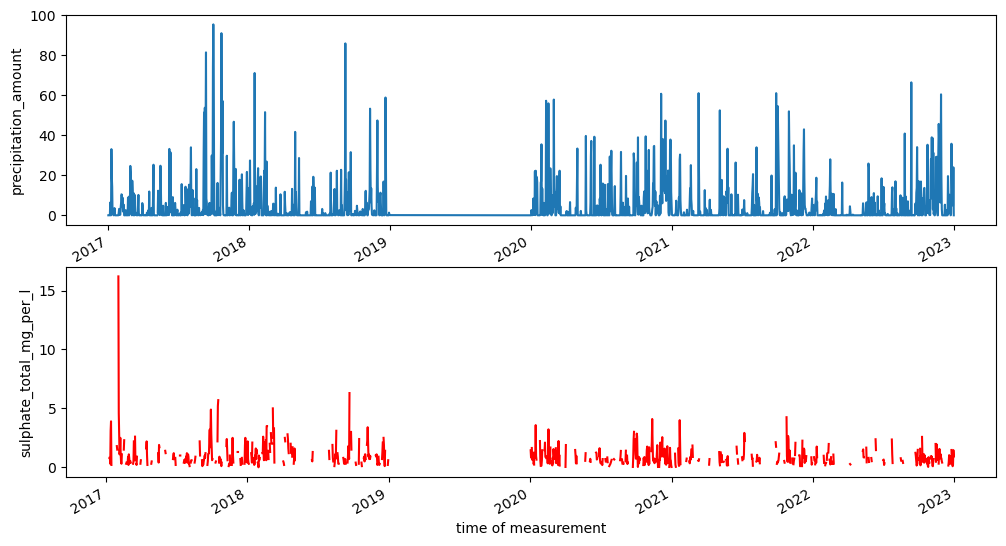

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ds.sulphate_total_mg_per_l.plot(ax=ax2, color='r')
ax2.set_ylabel('sulphate_total_mg_per_l')

ds.precipitation_amount.plot(ax=ax1)
ax1.set_ylabel('precipitation_amount')

plt.show()


In [ ]:
ds.precipitation_amount.groupby("time.year").sum()

<xarray.DataArray 'precipitation_amount' (year: 5)>
array([2091.7 , 1511.26, 2286.  , 1477.7 , 1618.  ])
Coordinates:
  * year     (year) int64 2017 2018 2020 2021 2022
Attributes: (12/39)
    standard_name:                          lwe_thickness_of_precipitation_am...
    units:                                  mm
    ancillary_variables:                    precipitation_amount_qc precipita...
    cell_methods:                           time: sum
    ebas_data_license:                      https://creativecommons.org/licen...
    ebas_revision_date:                     20230420091344
    ...                                     ...
    ebas_method_ref:                        NO01L_by_volume
    ebas_standard_method:                   SOP=EMEP_manual_v2014
    ebas_blank_correction:                  Not blank corrected
    ebas_detection_limit:                   0.1 mm
    ebas_organization:                      NO01L, Norwegian Institute for Ai...
    ebas_acknowledgement:                   Data used in this <study/report/f...

In [ ]:
ds.precipitation_amount.resample(time="Y").sum()

<xarray.DataArray 'precipitation_amount' (time: 6)>
array([2091.7 , 1511.26,     nan, 2286.  , 1477.7 , 1618.  ])
Coordinates:
  * time     (time) datetime64[ns] 2017-12-31 2018-12-31 ... 2022-12-31
Attributes: (12/39)
    standard_name:                          lwe_thickness_of_precipitation_am...
    units:                                  mm
    ancillary_variables:                    precipitation_amount_qc precipita...
    cell_methods:                           time: sum
    ebas_data_license:                      https://creativecommons.org/licen...
    ebas_revision_date:                     20230420091344
    ...                                     ...
    ebas_method_ref:                        NO01L_by_volume
    ebas_standard_method:                   SOP=EMEP_manual_v2014
    ebas_blank_correction:                  Not blank corrected
    ebas_detection_limit:                   0.1 mm
    ebas_organization:                      NO01L, Norwegian Institute for Ai...
    ebas_acknowledgement:                   Data used in this <study/report/f...

In [ ]:
ds = xr.open_dataset('5YZH-RWYM.nc')
ds

<xarray.Dataset>
Dimensions:                                       (time: 365, tbnds: 2,
                                                   metadata_time: 1,
                                                   precipitation_amount_qc_flags: 1,
                                                   ammonium_mg N_per_l_qc_flags: 1,
                                                   ammonium_mg_per_l_qc_flags: 1,
                                                   calcium_qc_flags: 1,
                                                   ...
                                                   sulphate_corrected_mg S_per_l_0_qc_flags: 1,
                                                   sulphate_corrected_mg S_per_l_1_qc_flags: 1,
                                                   sulphate_corrected_mg_per_l_0_qc_flags: 1,
                                                   sulphate_corrected_mg_per_l_1_qc_flags: 1,
                                                   sulphate_total_mg S_per_l_qc_flags: 1,
                                                   sulphate_total_mg_per_l_qc_flags: 1)
Coordinates:
  * time                                          (time) datetime64[ns] 2011-...
  * metadata_time                                 (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, precipitation_amount_qc_flags,
                                ammonium_mg N_per_l_qc_flags,
                                ammonium_mg_per_l_qc_flags, calcium_qc_flags,
                                chloride_qc_flags, conductivity_qc_flags,
                                magnesium_qc_flags,
                                nitrate_mg N_per_l_qc_flags,
                                ...
                                sulphate_corrected_mg S_per_l_0_qc_flags,
                                sulphate_corrected_mg S_per_l_1_qc_flags,
                                sulphate_corrected_mg_per_l_0_qc_flags,
                                sulphate_corrected_mg_per_l_1_qc_flags,
                                sulphate_total_mg S_per_l_qc_flags,
                                sulphate_total_mg_per_l_qc_flags
Data variables: (12/56)
    time_bnds                                     (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                            (metadata_time, tbnds) datetime64[ns] ...
    precipitation_amount                          (time) float64 ...
    precipitation_amount_qc                       (precipitation_amount_qc_flags, time) float64 ...
    precipitation_amount_ebasmetadata             (metadata_time) object ...
    ammonium_mg N_per_l                           (time) float64 ...
    ...                                            ...
    sulphate_total_mg S_per_l                     (time) float64 ...
    sulphate_total_mg S_per_l_qc                  (sulphate_total_mg S_per_l_qc_flags, time) float64 ...
    sulphate_total_mg S_per_l_ebasmetadata        (metadata_time) object ...
    sulphate_total_mg_per_l                       (time) float64 ...
    sulphate_total_mg_per_l_qc                    (sulphate_total_mg_per_l_qc_flags, time) float64 ...
    sulphate_total_mg_per_l_ebasmetadata          (metadata_time) object ...
Attributes: (12/87)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         Inorganics in precipitation at Birkenes
    keywords:                      calcium, mass_concentration_of_sulphate_co...
    id:                            5YZH-RWYM.nc
    naming_authority:              no.nilu.ebas
    ...                            ...
    ebas_framework_contact_name:   Wenche Aas, Kjetil Tørseth, Kjetil Tørseth
    ebas_framework_contact_email:  waa@nilu.no, kt@nilu.no, kt@nilu.no
    ebas_originator:               Aas, Wenche, waa@nilu.no, Norwegian Instit...
    ebas_submitter:                Hjellbrekke, Anne, agh@nilu.no, Norwegian ...
    ebas_acknowledgement:          Data used in this <study/report/figure/etc...

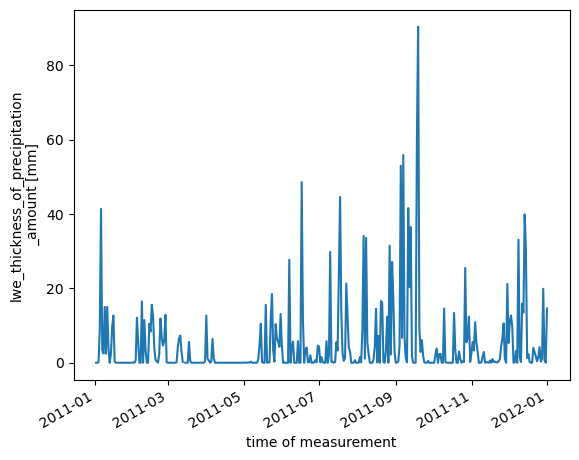

In [ ]:
ds.precipitation_amount.plot()